# import des données

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

ml_client = MLClient(
    credential=DefaultAzureCredential(),
    subscription_id="72eb7803-e874-44cb-b6d9-33f2fa3eb88c",
    resource_group_name="vpoutotrg",
    workspace_name="mlstudio-groupe4"
)

data_asset = ml_client.data.get("allo_cine", version="2.2.1")

df = pd.read_parquet(data_asset.path)
df = df[df['french_first_week_boxoffice'].notna()]
df["date"] = pd.to_datetime(df["date"], format='%Y-%m-%d', errors='coerce')
df = df[df['date'].notna()]
df['us_first_week_boxoffice'] = df['us_first_week_boxoffice'].fillna(0)
df.head()

Overriding of current TracerProvider is not allowed
Overriding of current LoggerProvider is not allowed
Overriding of current MeterProvider is not allowed
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Overriding of current TracerProvider is not allowed
Overriding of current LoggerProvider is not allowed
Overriding of current MeterProvider is not allowed
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented


,actors,critics_score,date,directors,editor,genre,langage,length,nationality,viewers_score,us_first_week_boxoffice,french_first_week_boxoffice,french_visa,title,vo_title,url
0,"[Arieh Worthalter, Arthur Harari, Stéphan Guér...",4.4,2023-09-27,[Cédric Kahn],Ad Vitam,"[Policier, Drame, Historique, Judiciaire]",[Français],116.0,[France],3.9,0.0,110011.0,157303,Le Procès Goldman,None,/article/fichearticle_gen_carticle=1000093547....
1,"[Monica Bellucci, Vincent Cassel, Albert Dupon...",3.5,2020-08-26,[Gaspar Noé],Carlotta Films,"[Drame, Thriller]","[Anglais, Français, Italien, Espagnol]",90.0,[France],NaN,0.0,2905.0,153336,Irréversible - Inversion Intégrale,None,/article/fichearticle_gen_carticle=18692477.html
2,[Thom Hoffman],2.8,2024-08-07,"[Richard Claus, Karsten Kiilerich]",Le Pacte,"[Aventure, Animation, Comédie, Famille]",[Néerlandais],84.0,"[Danemark, France, Allemagne, Pays-Bas]",3.0,0.0,39119.0,160622,Petit Panda en Afrique,Panda Bear in Africa,/article/fichearticle_gen_carticle=1000096064....
3,"[Lou de Laâge, Raphaël Personnaz, Isabelle Car...",3.3,2022-12-21,[Olivier Treiner],SND,[Drame],[Français],120.0,[France],3.8,0.0,64039.0,152607,Le Tourbillon de la vie,None,/article/fichearticle_gen_carticle=1000006465....
4,"[Michael B. Jordan, Jamie Foxx, Brie Larson, R...",3.0,2020-01-29,[Destin Daniel Cretton],Warner Bros. France,"[Biopic, Drame]",[Anglais],137.0,[U.S.A.],4.1,9713228.0,113153.0,152118,La Voie de la justice,Just Mercy,/video/player_gen_cmedia=19586793&cfilm=239735...


In [2]:
df.dtypes

actors                                 object
critics_score                         float64
date                           datetime64[ns]
directors                              object
editor                                 object
genre                                  object
langage                                object
length                                float64
nationality                            object
viewers_score                         float64
us_first_week_boxoffice               float64
french_first_week_boxoffice           float64
french_visa                            object
title                                  object
vo_title                               object
url                                    object
dtype: object

In [3]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

file_name = "cncAffluence"
version="2.0.0"

ml_client = MLClient(
    credential=DefaultAzureCredential(),
    subscription_id="72eb7803-e874-44cb-b6d9-33f2fa3eb88c",
    resource_group_name="vpoutotrg",
    workspace_name="mlstudio-groupe4"
)

data_asset = ml_client.data.get(file_name, version=version)

df_afluence = pd.read_parquet(data_asset.path)
df_afluence.head()

Overriding of current TracerProvider is not allowed
Overriding of current LoggerProvider is not allowed
Overriding of current MeterProvider is not allowed
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented


,box_office,is_prediction
month,,
2009-01-01,15.148333,0
2009-02-01,19.348000,0
2009-03-01,20.087500,0
2009-04-01,16.975000,0
2009-05-01,14.528333,0


In [4]:
file_name = "cncAffluence"
version="2.0.1"
data_asset = ml_client.data.get(file_name, version=version)

df_afluence_filled = pd.read_parquet(data_asset.path)
df_afluence_filled.head()

,box_office,is_prediction
month,,
1989-01-01,9.822903,1.0
1989-02-01,11.884946,1.0
1989-03-01,11.417790,1.0
1989-04-01,10.506531,1.0
1989-05-01,9.071718,1.0


In [5]:
file_name = "actors_jpbox"
version="2.0"

ml_client = MLClient(
    credential=DefaultAzureCredential(),
    subscription_id="72eb7803-e874-44cb-b6d9-33f2fa3eb88c",
    resource_group_name="vpoutotrg",
    workspace_name="mlstudio-groupe4"
)

data_asset = ml_client.data.get(file_name, version=version)

df_actors = pd.read_parquet(data_asset.path)
df_actors['name'] = df_actors["name"].apply(lambda x : x.replace(" ", "").replace("-", "").replace("_", "").strip().lower())
df_actors.set_index('name', inplace=True)
df_actors.head()

Overriding of current TracerProvider is not allowed
Overriding of current LoggerProvider is not allowed
Overriding of current MeterProvider is not allowed
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented


,amount_of_film_played_in,boxoffice_average,boxoffice_average_first_role,boxoffice_total,boxoffice_total_first_role,nationality,rank
name,,,,,,,
jasonsegel,15,197655,284469,3360134,2275749,américaine,551
katehudson,18,99462,94796,3083328,1801124,américaine,552
mirasorvino,16,81984,103371,3033394,1964043,américaine,553
alisonlohman,11,220324,211238,2643888,1056192,américaine,554
timallen,9,92895,121477,1579207,1579207,américaine,555


# Préparation du jeux d'entrainement et de test

In [ ]:
def remove_target_outliers(df, target_column, factor=1.5, max_values=True):
    """
    Supprime les outliers de la variable cible.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Le dataframe à nettoyer
    target_column : str
        Nom de la colonne cible
    factor : float, default=1.5
        Facteur multiplicatif de l'IQR pour définir le seuil des outliers
        
    Returns:
    --------
    pandas.DataFrame
        Dataframe sans outliers sur la cible
    """
    # Calcul des statistiques
    Q1 = df[target_column].quantile(0.25)
    Q3 = df[target_column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Définition des bornes
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    # Filtrage
    if max_values:
        df_clean = df[(df[target_column] >= lower_bound) & (df[target_column] <= upper_bound)]
    else:
        df_clean = df[(df[target_column] >= lower_bound)]
    
    # Statistiques sur les outliers supprimés
    n_removed = len(df) - len(df_clean)
    print(f"Nombre d'outliers supprimés : {n_removed} ({n_removed/len(df)*100:.2f}%)")
    print(f"Valeur minimale conservée : {df_clean[target_column].min()}")
    if max_values:
        print(f"Valeur maximale conservée : {df_clean[target_column].max()}")
    
    return df_clean

def remove_outliers_zscore(df, columns, threshold=3.0):
    """
    Supprime les outliers basés sur le z-score (nombre d'écarts-types par rapport à la moyenne).
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Le dataframe à nettoyer
    columns : list
        Liste des colonnes à traiter
    threshold : float, default=3.0
        Seuil de z-score au-delà duquel une valeur est considérée comme outlier
        
    Returns:
    --------
    pandas.DataFrame
        Dataframe sans outliers
    """
    df_clean = df.copy()
    
    for col in columns:
        # Calcul des z-scores
        mean = df_clean[col].mean()
        std = df_clean[col].std()
        z_scores = abs((df_clean[col] - mean) / std)
        
        # Suppression des outliers
        df_clean = df_clean[z_scores < threshold]
    
    # Affichage du nombre de lignes supprimées
    n_removed = len(df) - len(df_clean)
    print(f"Nombre de lignes supprimées : {n_removed} ({n_removed/len(df)*100:.2f}%)")
    
    return df_clean

def put_national_affluence(x, filled = False):
    date = pd.to_datetime(f"{x.year}-{x.month:02d}-01")
    if filled:
        return df_afluence_filled.loc[date, 'box_office'] if date in df_afluence_filled.index else None
    else:
        return df_afluence.loc[date, 'box_office'] if date in df_afluence.index else None

def max_score_actors(x, method="boxoffice_average"):
    max_score = 0
    for actor in x:
        if actor.replace(" ", "").replace("-", "").replace("_", "").strip().lower() in df_actors.index :
            max_score = max(max_score, df_actors.loc[actor.replace(" ", "").replace("-", "").replace("_", "").strip().lower(), method])
    return max_score

def mean_score_actors(x, method="boxoffice_average"):
    scores = []
    for actor in x:
        if actor.replace(" ", "").replace("-", "").replace("_", "").strip().lower() in df_actors.index :
            scores.append(df_actors.loc[actor.replace(" ", "").replace("-", "").replace("_", "").strip().lower(), method])
    if len(scores) == 0:
        mean_scores = 0
    else:
        mean_scores = np.mean(scores)
    return mean_scores

def sum_score_actors(x, method="boxoffice_average"):
    sum_score = 0
    for actor in x:
        if actor.replace(" ", "").replace("-", "").replace("_", "").strip().lower() in df_actors.index :
            sum_score += df_actors.loc[actor.replace(" ", "").replace("-", "").replace("_", "").strip().lower(), method]
    return sum_score
    


features_of_interest = [
    'french_prod',
    'date',
    'directors',
    'editor',
    'genre',
    'length',
    'number_actors',
    'usa_prod',
    'national_affluence',
    'french_langage', 
    'english_langage',
    'max_average_actor'
]
#,    'sum_score_actor'

info_film = ['french_visa', 'title', 'vo_title', 'url']
numerical_features = ['length',
                    'national_affluence',
                    'french_langage',
                    'english_langage',
                    'french_prod',
                    'usa_prod',
                    'number_actors',
                    'max_average_actor']
# 'sum_score_actor'
date_feature = ['date']
categorical_features = ['editor']
list_categorical_features = ['genre', 'directors']
target = 'french_first_week_boxoffice'

def pre_transform_df(df, **kwargs):
    # Paramètres avec valeurs par défaut
    national_affluence = kwargs.get("national_affluence", True)
    remove_outliers = kwargs.get("remove_outliers", True)
    method_outliers = kwargs.get("method_outliers", "IQR")
    factor_outliers = kwargs.get("factor_outliers", 1.5)
    actor_method = kwargs.get("actor_method", "boxoffice_average")
    national_affluence_filled = kwargs.get("national_affluence_filled", False)
    max_values_outliers = kwargs.get("max_values_outliers", True)

    # Paramètres obligatoires attendus dans kwargs
    features_of_interest = kwargs.get("features_of_interest")
    numerical_features = kwargs.get("numerical_features")
    date_feature = kwargs.get("date_feature")
    categorical_features = kwargs.get("categorical_features")
    list_categorical_features = kwargs.get("list_categorical_features")
    target = kwargs.get("target", "french_first_week_boxoffice")

    # Validation des features
    try:
        all_expected = numerical_features + date_feature + categorical_features + list_categorical_features
        missing_features = [f for f in all_expected if f not in features_of_interest]
        if missing_features:
            raise ValueError(f"Les features suivantes sont manquantes dans features_of_interest : {missing_features}")
    except Exception as e:
        print(f"[Erreur de validation des features] {e}")

    # Remplissage des NaN dans certaines colonnes
    for col in ['genre', 'langage', 'nationality', 'actors']:
        df[col] = df[col].mask(df[col].isna(), ['no value'])

    # Ajout de la colonne national_affluence
    if national_affluence:
        df['national_affluence'] = df['date'].apply(lambda x : put_national_affluence(x,national_affluence_filled))

    # Création des variables dérivées
    if 'french_prod' in features_of_interest:
        df['french_prod'] = df['nationality'].apply(lambda x: 1 if "France" in x else 0)
    if 'usa_prod' in features_of_interest:
        df['usa_prod'] = df['nationality'].apply(lambda x: 1 if "U.S.A." in x else 0)
    if 'french_langage' in features_of_interest:
        df['french_langage'] = df['langage'].apply(lambda x: 1 if "Français" in x else 0)
    if 'english_langage' in features_of_interest:
        df['english_langage'] = df['langage'].apply(lambda x: 1 if "Anglais" in x else 0)
    if 'number_actors' in features_of_interest:
        df['number_actors'] = df['actors'].apply(lambda x: len(x))
    if 'max_average_first_role_actor' in features_of_interest:
        df['max_average_first_role_actor'] = df['actors'].apply(lambda x : max_score_actors(x, "boxoffice_average_first_role")) 
    if 'max_average_actor' in features_of_interest:
        df['max_average_actor'] = df['actors'].apply(lambda x : max_score_actors(x, "boxoffice_average")) 
    if 'max_total_actor' in features_of_interest:
        df['max_total_actor'] = df['actors'].apply(lambda x : max_score_actors(x, "boxoffice_total")) 
    if 'sum_score_actor' in features_of_interest:
        df['sum_score_actor'] = df['actors'].apply(lambda x : sum_score_actors(x, actor_method)) 
    if 'mean_average_actor' in features_of_interest:
        df['mean_average_actor'] = df['actors'].apply(lambda x : mean_score_actors(x, "boxoffice_total")) 

    # Traitement des outliers
    if remove_outliers:
        if method_outliers == "IQR":
            df = remove_target_outliers(df, target, factor=factor_outliers, max_values=max_values_outliers)
        elif method_outliers == "z-scores":
            df = remove_outliers_zscore(df, [target], threshold=factor_outliers)
        else:
            print(f"{method_outliers} is not a valid method for outliers")

    return df, df[features_of_interest], df[target]


giga_big_param = {
    "national_affluence" : True,
    "remove_outliers" : True,
    "method_outliers" : "IQR", # "IQR" ou "z-scores"
    "features_of_interest" : features_of_interest,
    "numerical_features" : numerical_features,
    "date_feature" : date_feature,
    "categorical_features" : categorical_features,
    "list_categorical_features" : list_categorical_features,
    "target" : target,
    "actor_method" : "boxoffice_average_first_role", # "boxoffice_average", "boxoffice_total", "boxoffice_total_first_role" ou "boxoffice_average_first_role"
    "national_affluence_filled" : True,
    "max_values_outliers": False
}


df, X, y = pre_transform_df(df, **giga_big_param)

Nombre d'outliers supprimés : 985 (10.76%)
Valeur minimale conservée : 5.0
Valeur maximale conservée : 434397.0


In [7]:
def time_based_split(df, test_years=3, test_ratio=0.5):
    """
    Crée un découpage train/test basé sur le temps.
    
    Args:
        df: DataFrame avec les données
        test_years: Nombre d'années récentes à considérer pour le découpage
        test_ratio: Proportion des films des années récentes à mettre dans le test set
    
    Returns:
        indices_train, indices_test
    """
    # Convertir en datetime si ce n'est pas déjà fait
    df["date"] = pd.to_datetime(df["date"])
    
    # Déterminer la date limite pour les dernières années
    max_date = df["date"].max()
    cutoff_date = pd.Timestamp(year=max_date.year - test_years, month=1, day=1)
    
    # Créer un masque pour les films récents
    recent_mask = df["date"] >= cutoff_date
    
    # Séparer les indices en entrainement et test
    old_indices = df[~recent_mask].index.tolist()
    recent_indices = df[recent_mask].index.tolist()
    
    # Trier les indices récents par date pour pouvoir prendre un film sur deux
    recent_sorted = sorted([(idx, df.loc[idx, "date"]) for idx in recent_indices], 
                           key=lambda x: x[1])
    recent_indices_sorted = [item[0] for item in recent_sorted]
    
    # Prendre un film sur deux dans les données récentes pour le test
    test_size = int(len(recent_indices_sorted) * test_ratio)
    
    # Option 1: Prendre aléatoirement test_ratio des films récents
    np.random.seed(42)
    test_indices = np.random.choice(recent_indices_sorted, size=test_size, replace=False)
    
    # Option 2: Prendre un film sur deux chronologiquement
    # test_indices = recent_indices_sorted[::int(1/test_ratio)] if test_ratio <= 0.5 else recent_indices_sorted

    train_indices = [idx for idx in df.index if idx not in test_indices]
    
    print(f"Découpage temporel: {len(train_indices)} films pour l'entrainement, {len(test_indices)} films pour le test")
    print(f"Plage de dates d'entrainement: {df.loc[train_indices, "date"].min()} à {df.loc[train_indices, "date"].max()}")
    print(f"Plage de dates de test: {df.loc[test_indices, "date"].min()} à {df.loc[test_indices, "date"].max()}")
    
    return train_indices, test_indices

In [8]:
train_indices, test_indices = time_based_split(df, test_years=3, test_ratio=0.5)
X_train, X_test = X.loc[train_indices], X.loc[test_indices]
y_train, y_test = y.loc[train_indices], y.loc[test_indices]

Découpage temporel: 7448 films pour l'entrainement, 718 films pour le test
Plage de dates d'entrainement: 1994-11-23 00:00:00 à 2025-04-09 00:00:00
Plage de dates de test: 2022-01-05 00:00:00 à 2025-05-28 00:00:00


# preprocessor, modèle et Optuna

In [9]:
from sklearn.model_selection import TimeSeriesSplit

def time_series_cv_split(X_train, y_train, n_splits=5):
    """
    Crée plusieurs découpages temporels pour la validation croisée.
    
    Args:
        X_train: Features d'entrainement
        y_train: Target d'entrainement
        n_splits: Nombre de découpages
    
    Returns:
        Une liste de tuples (train_idx, val_idx)
    """
    # Assurons-nous que X_train contient la colonne date
    if  "date" not in X_train.columns:
        raise ValueError(f"La colonne 'date' n'est pas dans X_train")
    
    # Trier les indices par date
    sorted_indices = X_train.sort_values(by= "date").index
    
    # Utiliser TimeSeriesSplit pour créer des découpages temporels
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    # Convertir les découpages en indices réels
    cv_indices = []
    for train_idx, val_idx in tscv.split(sorted_indices):
        real_train_idx = sorted_indices[train_idx]
        real_val_idx = sorted_indices[val_idx]
        cv_indices.append((real_train_idx, real_val_idx))
    
    return cv_indices

In [10]:
import optuna
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MultiLabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

class MultiLabelBinarizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlbs = {}  # Stocke un MultiLabelBinarizer pour chaque colonne
    
    def fit(self, X, y=None):
        for col in X.columns:
            self.mlbs[col] = MultiLabelBinarizer()
            self.mlbs[col].fit(X[col])
        return self
    
    def transform(self, X):
        transformed_list = []
        for col in X.columns:
            transformed = self.mlbs[col].transform(X[col])
            new_columns = [f"{col}_{label}" for label in self.mlbs[col].classes_]
            transformed_list.append(pd.DataFrame(transformed, columns=new_columns, index=X.index))
        return pd.concat(transformed_list, axis=1)
    
    def get_feature_names_out(self, input_features=None):
        # Collecter tous les noms de colonnes de sortie
        feature_names = []
        for col in self.mlbs.keys():
            feature_names.extend([f"{col}_{label}" for label in self.mlbs[col].classes_])
        return np.array(feature_names)

class CustomDateTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names_out = ['year', 'month', 'day', 'dayofweek']
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        result = pd.DataFrame({
            'year': X['date'].dt.year,
            'month': X['date'].dt.month,
            'day': X['date'].dt.day,
            'dayofweek': X['date'].dt.dayofweek
        })
        return result
    
    def get_feature_names_out(self, input_features=None):
        return np.array(self.feature_names_out)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Fonction pour créer le pipeline avec des hyperparamètres spécifiques
def create_model(params, numerical_features, date_feature, categorical_features, list_categorical_features):
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    date_transformer = Pipeline(steps=[
        ('date_features', CustomDateTransformer())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    list_categorical_transformer = Pipeline(steps=[
        ('multi_label', MultiLabelBinarizerTransformer())
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('date', date_transformer, date_feature),
            ('cat', categorical_transformer, categorical_features),
            ('list', list_categorical_transformer, list_categorical_features)
        ],
        remainder='passthrough'
    )
    
    xgboost_reg = xgb.XGBRegressor(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        learning_rate=params['learning_rate'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        min_child_weight=params['min_child_weight'],
        reg_alpha=params['reg_alpha'],
        reg_lambda=params['reg_lambda'],
        gamma=params['gamma'],
        scale_pos_weight=params['scale_pos_weight'],
        random_state=42
    )
    
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('xgboost', xgboost_reg)
    ])
    
    return model


/home/utilisateur/Documents/Simplon/new_is_always_better/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:

# Fonction objective pour Optuna
def objective(trial, X_train, y_train, X_val, y_val, numerical_features, date_feature, categorical_features, list_categorical_features):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5, log=True),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 2.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 2.0, log=True),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.8, 1.2)
    }
    
    model = create_model(params, numerical_features, date_feature, categorical_features, list_categorical_features)
    model.fit(X_train, y_train)
    
    y_pred_val = model.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred_val)
    
    return rmse

# Fonction principale d'optimisation
def optimize_xgboost(X_train, y_train, numerical_features, date_feature, categorical_features, list_categorical_features, n_trials=100):
    # Création d'un ensemble de validation
    from sklearn.model_selection import train_test_split
    X_train_opt, X_val, y_train_opt, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )
    
    # Création de l'étude Optuna
    study = optuna.create_study(direction='minimize')
    study.optimize(
        lambda trial: objective(
            trial, X_train_opt, y_train_opt, X_val, y_val,
            numerical_features, date_feature, categorical_features, list_categorical_features
        ),
        n_trials=n_trials
    )
    
    print("Meilleurs paramètres trouvés :")
    for key, value in study.best_params.items():
        print(f"    {key}: {value}")
    
    # Entraînement du modèle final avec les meilleurs paramètres
    best_params = study.best_params
    best_model = create_model(best_params, numerical_features, date_feature, categorical_features, list_categorical_features)
    best_model.fit(X_train, y_train)
    
    return best_model, study

# Fonction pour évaluer le modèle
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    
    return mae, rmse, r2

# Visualisation des résultats d'optimisation
def plot_optimization_history(study):
    import matplotlib.pyplot as plt
    
    # Graphique des valeurs objectives au fil des essais
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(study.trials)), [t.value for t in study.trials], marker='o', linestyle='-')
    plt.xlabel('Numéro d\'essai')
    plt.ylabel('RMSE')
    plt.title('Évolution du RMSE pendant l\'optimisation')
    plt.grid(True)
    plt.show()
    
    # Graphiques d'importance des paramètres
    try:
        importances = optuna.importance.get_param_importances(study)
        plt.figure(figsize=(10, 6))
        plt.bar(importances.keys(), importances.values())
        plt.xlabel('Hyperparamètre')
        plt.ylabel('Importance')
        plt.title('Importance des hyperparamètres')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    except:
        print("Impossible de calculer l'importance des paramètres.")

In [12]:
# # Nombre d'essais à réaliser (ajustez selon vos ressources de calcul)
# n_trials = 5
# import warnings
# warnings.filterwarnings('ignore')

# # Optimisation
# best_model, study = optimize_xgboost(
#     X_train, y_train,
#     numerical_features, date_feature, categorical_features, list_categorical_features,
#     n_trials=n_trials
# )


In [13]:
# mae, rmse, r2 = evaluate_model(best_model, X_test, y_test)

In [14]:
# plot_optimization_history(study)

In [15]:
import matplotlib.pyplot as plt

def objective_time_based(trial, X, y, cv_splits, numerical_features, 
                         date_feature, categorical_features, list_categorical_features):
    # Définir les hyperparamètres
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 800, step=10),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5, log=True),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 0.5, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.8, 1.2)
    }
    
    # Mesurer la performance sur chaque découpage
    rmse_scores = []
    for train_idx, val_idx in cv_splits:
        # Extraire les données pour ce découpage
        X_train_fold, X_val_fold = X.loc[train_idx], X.loc[val_idx]
        y_train_fold, y_val_fold = y.loc[train_idx], y.loc[val_idx]
        
        # Créer et entrainer le modèle
        model = create_model(params, numerical_features, date_feature, categorical_features, list_categorical_features)
        model.fit(X_train_fold, y_train_fold)
        
        # Évaluer le modèle
        y_pred_val = model.predict(X_val_fold)
        rmse = root_mean_squared_error(y_val_fold, y_pred_val)
        rmse_scores.append(rmse)
    
    # Retourner la moyenne des RMSE
    return np.mean(rmse_scores)


def optimize_xgboost_time_based(df, X, y, target_column,
                               numerical_features, date_feature, categorical_features, list_categorical_features,
                               test_years=3, test_ratio=0.5, n_cv_splits=3, n_trials=100):
    """
    Optimise un modèle XGBoost avec validation temporelle.
    
    Args:
        df: DataFrame complet (pour le découpage temporel)
        X: Features
        y: Target
        target_column: Nom de la colonne cible
        numerical_features, date_feature, categorical_features, list_categorical_features: Listes de colonnes
        test_years: Nombre d'années récentes à considérer pour le test
        test_ratio: Proportion des films récents à utiliser pour le test
        n_cv_splits: Nombre de découpages pour la validation croisée
        n_trials: Nombre d'essais pour Optuna
    
    Returns:
        best_model, default_model, study, train_indices, test_indices
    """
    # Créer le découpage train/test basé sur le temps
    train_indices, test_indices = time_based_split(df, test_years, test_ratio)
    
    # Extraire les données d'entrainement et de test
    X_train, X_test = X.loc[train_indices], X.loc[test_indices]
    y_train, y_test = y.loc[train_indices], y.loc[test_indices]
    
    # Visualiser la distribution temporelle des données
    plt.figure(figsize=(12, 6))
    plt.scatter(X_train["date"], y_train, alpha=0.5, label='Entrainement')
    plt.scatter(X_test["date"], y_test, alpha=0.5, label='Test')
    plt.title('Distribution temporelle des données d\'entrainement et de test')
    plt.xlabel('Date')
    plt.ylabel(target_column)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Créer les découpages pour la validation croisée temporelle
    cv_splits = time_series_cv_split(X_train, y_train, n_splits=n_cv_splits)
    
    # Visualiser les découpages CV
    plt.figure(figsize=(12, 6))
    for i, (train_idx, val_idx) in enumerate(cv_splits):
        # Extraire les dates min et max pour chaque découpage
        train_dates = X_train.loc[train_idx, "date"]
        val_dates = X_train.loc[val_idx, "date"]
        
        plt.plot([train_dates.min(), train_dates.max()], [i, i], 'b-', linewidth=2)
        plt.plot([val_dates.min(), val_dates.max()], [i, i], 'r-', linewidth=2)
    
    plt.title('Découpages de validation croisée temporelle')
    plt.xlabel('Date')
    plt.ylabel('Numéro du découpage')
    plt.legend(['Entrainement', 'Validation'])
    plt.grid(True)
    plt.show()
    
    # Entrainer un modèle par défaut comme référence
    default_model = Pipeline([
        ('preprocessor', ColumnTransformer(
            transformers=[
                ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]), numerical_features),
                ('date', Pipeline(steps=[('date_features', CustomDateTransformer())]), date_feature),
                ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features),
                ('list', Pipeline(steps=[('multi_label', MultiLabelBinarizerTransformer())]), list_categorical_features)
            ],
            remainder='passthrough'
        )),
        ('xgboost', xgb.XGBRegressor(random_state=42))
    ])
    
    default_model.fit(X_train, y_train)
    default_test_pred = default_model.predict(X_test)
    default_rmse_test = root_mean_squared_error(y_test, default_test_pred)
    default_mae_test = mean_absolute_error(y_test, default_test_pred)
    default_r2_test = r2_score(y_test, default_test_pred)
    
    print("\nPerformances du modèle par défaut sur le jeu de test:")
    print(f"MAE: {default_mae_test}")
    print(f"RMSE: {default_rmse_test}")
    print(f"R²: {default_r2_test}")
    
    # Optimisation avec Optuna
    study = optuna.create_study(direction='minimize')
    
    # Inclure le modèle par défaut comme premier essai
    default_params = {
        'n_estimators': 100,  # valeur par défaut
        'max_depth': 6,       # valeur par défaut
        'learning_rate': 0.3, # valeur par défaut
        'subsample': 1.0,     # valeur par défaut
        'colsample_bytree': 1.0, # valeur par défaut
        'min_child_weight': 1,   # valeur par défaut
        'reg_alpha': 1e-8,       # bug avec 0
        'reg_lambda': 1,      # valeur par défaut
        'gamma': 0,           # valeur par défaut
        'scale_pos_weight': 1.0  # valeur par défaut
    }
    
    # Ajouter manuellement l'essai par défaut
    study.enqueue_trial(default_params)
    
    # Optimisation avec validation temporelle
    study.optimize(
        lambda trial: objective_time_based(
            trial, X_train, y_train, cv_splits,
            numerical_features, date_feature, categorical_features, list_categorical_features
        ),
        n_trials=n_trials
    )
    
    print("Meilleurs paramètres trouvés :")
    for key, value in study.best_params.items():
        print(f"    {key}: {value}")
    
    # Entraînement du modèle final avec les meilleurs paramètres
    best_params = study.best_params
    best_model = create_model(best_params, numerical_features, date_feature, categorical_features, list_categorical_features)
    best_model.fit(X_train, y_train)
    
    # Évaluation du modèle optimisé
    best_test_pred = best_model.predict(X_test)
    best_rmse_test = root_mean_squared_error(y_test, best_test_pred)
    best_mae_test = mean_absolute_error(y_test, best_test_pred)
    best_r2_test = r2_score(y_test, best_test_pred)
    
    print("\nPerformances du modèle optimisé sur le jeu de test:")
    print(f"MAE: {best_mae_test}")
    print(f"RMSE: {best_rmse_test}")
    print(f"R²: {best_r2_test}")
    
    # Visualiser les prédictions vs réalité
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, default_test_pred, alpha=0.5, label='Modèle par défaut')
    plt.scatter(y_test, best_test_pred, alpha=0.5, label='Modèle optimisé')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.title('Prédictions vs Réalité')
    plt.xlabel('Box-office réel')
    plt.ylabel('Box-office prédit')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Visualiser l'erreur en fonction du temps
    plt.figure(figsize=(12, 6))
    default_errors = np.abs(y_test - default_test_pred)
    best_errors = np.abs(y_test - best_test_pred)
    plt.scatter(X_test["date"], default_errors, alpha=0.5, label='Erreur modèle par défaut')
    plt.scatter(X_test["date"], best_errors, alpha=0.5, label='Erreur modèle optimisé')
    plt.title('Erreur absolue en fonction du temps')
    plt.xlabel('Date')
    plt.ylabel('Erreur absolue')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return best_model, default_model, study, train_indices, test_indices


In [16]:
import xgboost as xgb
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

date_transformer = Pipeline(steps=[
    ('date_features', CustomDateTransformer())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

list_categorical_transformer = Pipeline(steps=[
    ('multi_label', MultiLabelBinarizerTransformer())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('date', date_transformer, date_feature),
        ('cat', categorical_transformer, categorical_features),
        ('list', list_categorical_transformer, list_categorical_features)
    ],
    remainder='passthrough'
)

xgboost_model = Pipeline([
    ('preprocessor', preprocessor),  
    ('xgboost', xgb.XGBRegressor())
])

xgboost_model.fit(X_train,y_train)
y_pred = xgboost_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 35814.36802919861
RMSE: 61484.94098717242
R²: 0.45066275585403304


avec box_offic_average : { avec sum
MAE: 36432.60271224338
RMSE: 61887.463404940965
R²: 0.44344653818468904  sans sum MAE: 36084.12327807328
RMSE: 61723.08973224907
R²: 0.4463990342815094}

avec boxoffice_average_first_role : MAE: 36293.96162465555
RMSE: 62502.41081390628
R²: 0.4323311527184518

MAE: 37076.06212681848
RMSE: 63152.59489448777
R²: 0.42045932325498503
                    'max_average_first_role_actor',
                    'max_average_actor',
                    'max_total_actor'

# Recherche et meilleurs modèle

Découpage temporel: 7448 films pour l'entrainement, 718 films pour le test
Plage de dates d'entrainement: 1994-11-23 00:00:00 à 2025-04-09 00:00:00
Plage de dates de test: 2022-01-05 00:00:00 à 2025-05-28 00:00:00


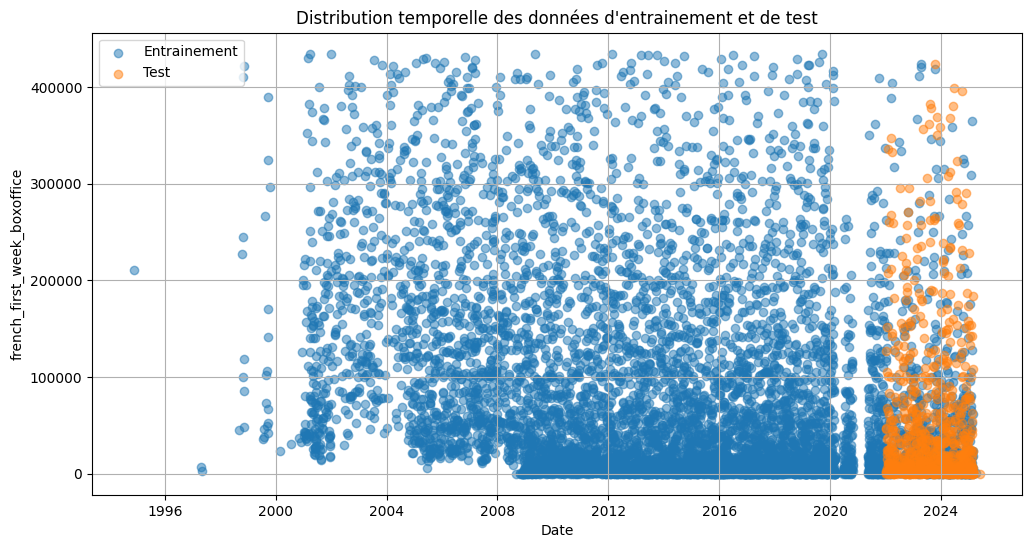

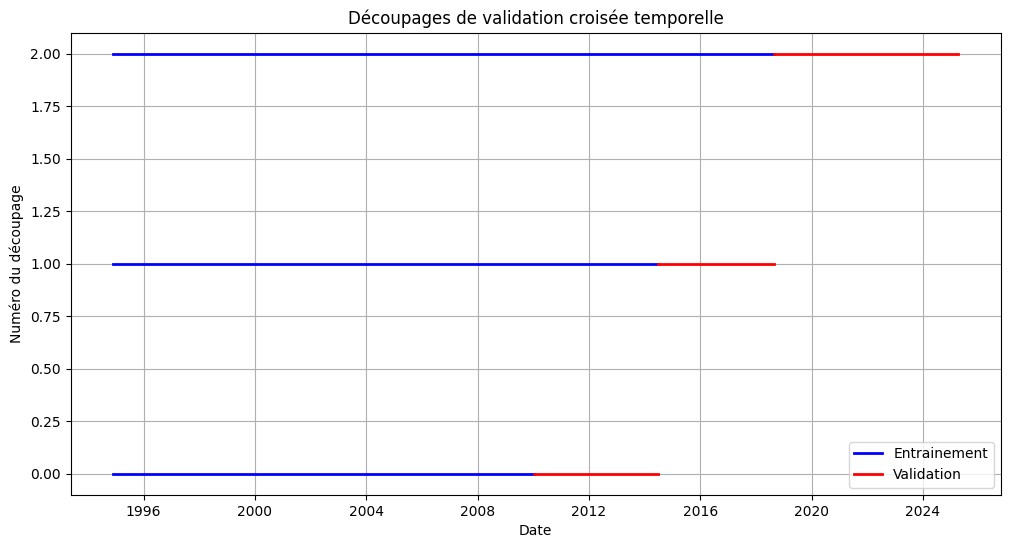

[I 2025-04-15 09:51:43,557] A new study created in memory with name: no-name-8ce7c907-7b89-424f-a706-039e510df4d8



Performances du modèle par défaut sur le jeu de test:
MAE: 35814.36802919861
RMSE: 61484.94098717242
R²: 0.45066275585403304


[I 2025-04-15 09:51:49,115] Trial 0 finished with value: 68719.43765918881 and parameters: {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.3, 'subsample': 1.0, 'colsample_bytree': 1.0, 'min_child_weight': 1, 'reg_alpha': 1e-08, 'reg_lambda': 1.0, 'gamma': 0.0, 'scale_pos_weight': 1.0}. Best is trial 0 with value: 68719.43765918881.
[I 2025-04-15 09:52:18,849] Trial 1 finished with value: 72558.575294872 and parameters: {'n_estimators': 670, 'max_depth': 5, 'learning_rate': 0.13654314248972166, 'subsample': 0.7579524807212744, 'colsample_bytree': 0.8504967998037753, 'min_child_weight': 5, 'reg_alpha': 2.5884158012542155e-08, 'reg_lambda': 0.024827035919686054, 'gamma': 0.27704192145133244, 'scale_pos_weight': 1.002275010545432}. Best is trial 0 with value: 68719.43765918881.
[I 2025-04-15 09:52:28,554] Trial 2 finished with value: 68141.28047370246 and parameters: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.10011114171775976, 'subsample': 0.8961133810637679, 'colsa

Meilleurs paramètres trouvés :
    n_estimators: 690
    max_depth: 6
    learning_rate: 0.016243575759736787
    subsample: 0.7581292186425277
    colsample_bytree: 0.6169837686915874
    min_child_weight: 2
    reg_alpha: 0.26045563754355533
    reg_lambda: 0.6705358923897464
    gamma: 0.4467580816741659
    scale_pos_weight: 0.8896718027291808

Performances du modèle optimisé sur le jeu de test:
MAE: 35581.47448565767
RMSE: 60554.97728879892
R²: 0.46715460780701545


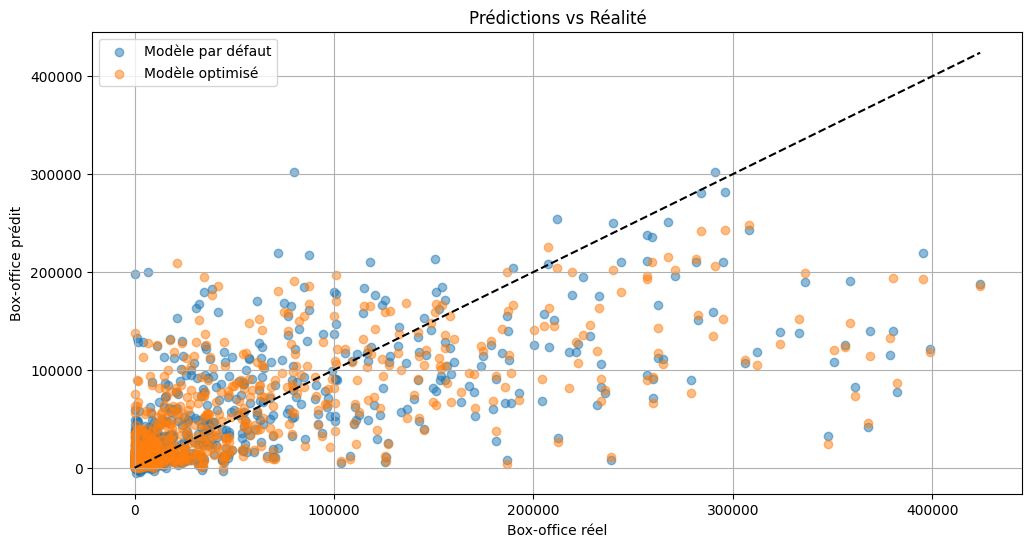

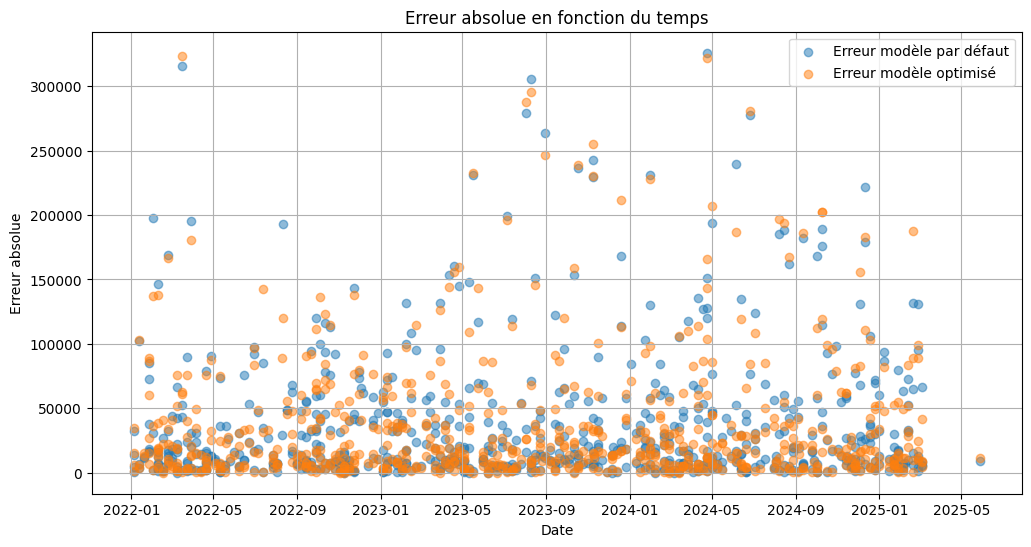

In [17]:
import warnings
warnings.filterwarnings('ignore')

best_model, default_model, study, train_indices, test_indices = optimize_xgboost_time_based(
    df=df, 
    X=X, y=y,
    target_column='french_first_week_boxoffice',
    numerical_features=numerical_features,
    date_feature=date_feature,
    categorical_features=categorical_features,
    list_categorical_features=list_categorical_features,
    test_years=3,    
    test_ratio=0.5,     
    n_cv_splits=3,     
    n_trials=100         
)

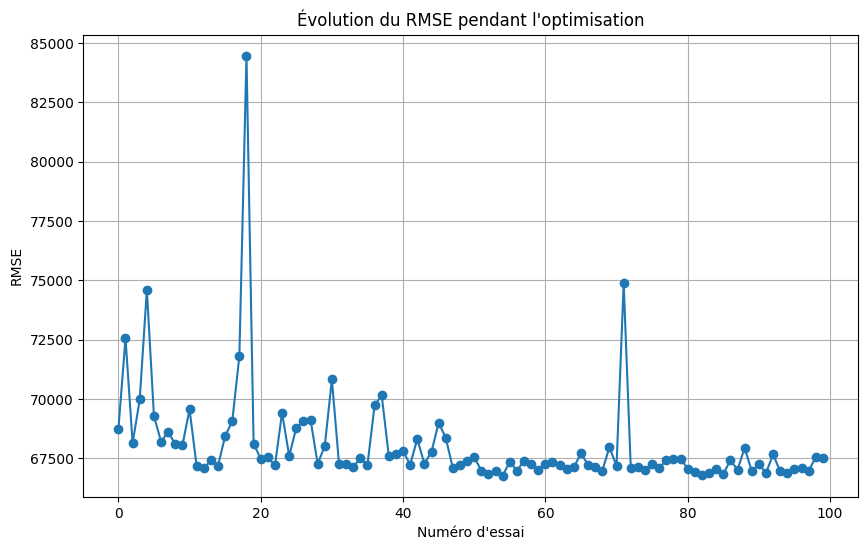

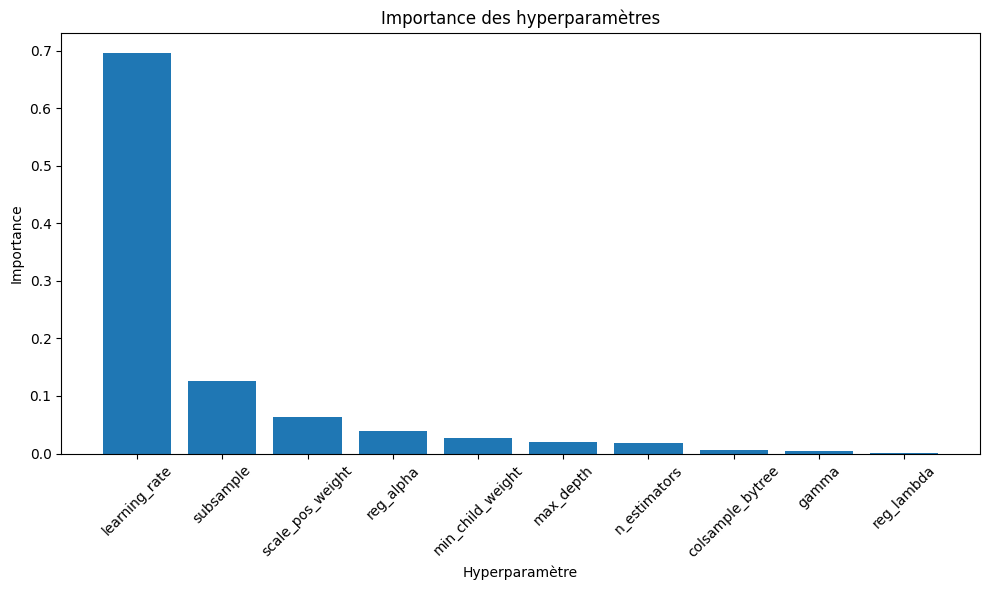

In [18]:
plot_optimization_history(study)

In [19]:
# if hasattr(best_model[-1], 'feature_importances_'):
#     # Obtenir les noms des features après prétraitement
#     preprocessor = best_model.named_steps['preprocessor']
#     feature_names = preprocessor.get_feature_names_out()
    
#     # Obtenir les importances
#     importances = best_model.named_steps['xgboost'].feature_importances_
    
#     # Trier par importance décroissante
#     indices = np.argsort(importances)[::-1]
#     print(len(indices))
#     # Afficher les importances
#     plt.figure(figsize=(12, 8))
#     plt.title('Importance des features')
#     plt.bar(range(len(indices)), importances[indices], align='center')
#     plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
#     plt.tight_layout()
#     plt.show()

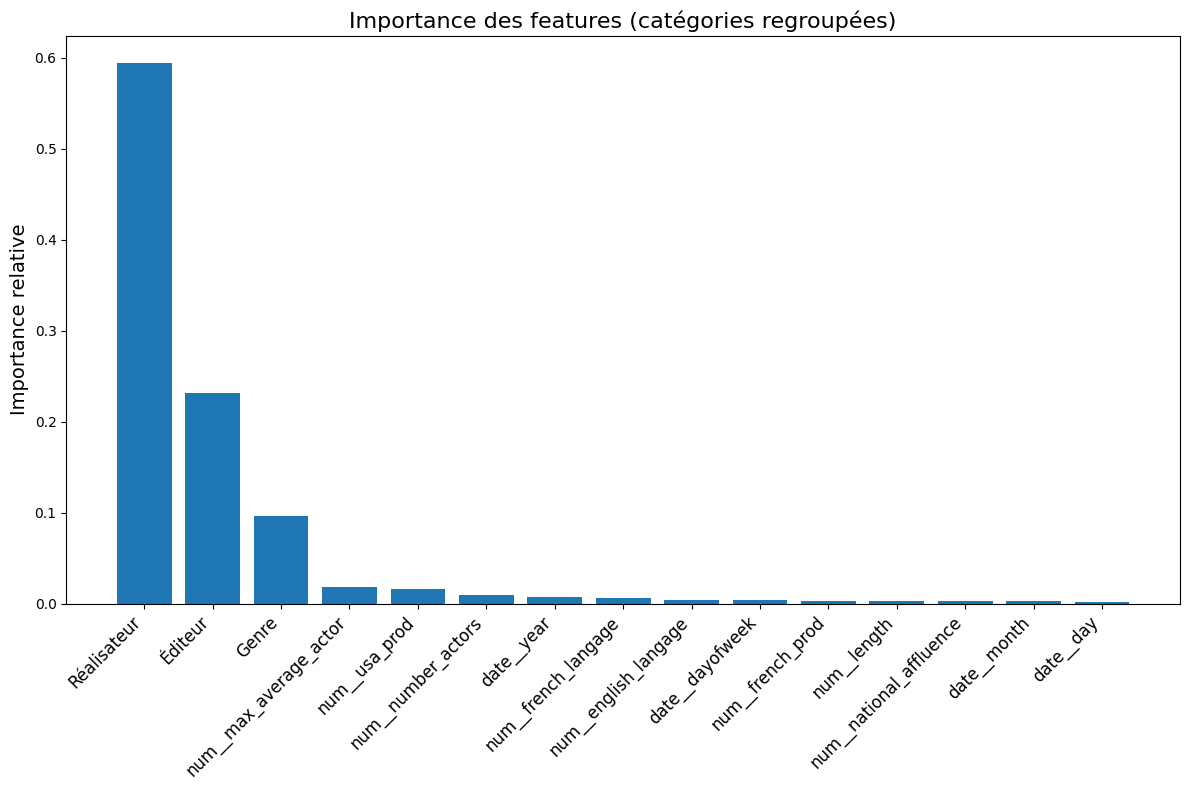

Importance des features regroupées:
Réalisateur: 0.5946
Éditeur: 0.2311
Genre: 0.0958
num__max_average_actor: 0.0186
num__usa_prod: 0.0164
num__number_actors: 0.0098
date__year: 0.0067
num__french_langage: 0.0062
num__english_langage: 0.0037
date__dayofweek: 0.0036
num__french_prod: 0.0033
num__length: 0.0031
num__national_affluence: 0.0026
date__month: 0.0024
date__day: 0.0021


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

if hasattr(best_model[-1], 'feature_importances_'):
    # Obtenir les noms des features après prétraitement
    preprocessor = best_model.named_steps['preprocessor']
    feature_names = preprocessor.get_feature_names_out()
    
    # Obtenir les importances
    importances = best_model.named_steps['xgboost'].feature_importances_
    
    # Créer un DataFrame pour faciliter le regroupement
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    })
    
    # Initialiser un dictionnaire pour stocker les importances regroupées
    grouped_importances = {}
    
    # Regrouper les features par préfixe
    for feature, importance in zip(feature_names, importances):
        if feature.startswith('cat__editor_'):
            key = 'Éditeur'
            if key not in grouped_importances:
                grouped_importances[key] = 0
            grouped_importances[key] += importance
        elif feature.startswith('list__genre_'):
            key = 'Genre'
            if key not in grouped_importances:
                grouped_importances[key] = 0
            grouped_importances[key] += importance
        elif feature.startswith('list__directors_'):
            key = 'Réalisateur'
            if key not in grouped_importances:
                grouped_importances[key] = 0
            grouped_importances[key] += importance
        else:
            # Garder les autres features telles quelles
            grouped_importances[feature] = importance
    
    # Convertir en DataFrame pour le tri et l'affichage
    grouped_df = pd.DataFrame({
        'feature': list(grouped_importances.keys()),
        'importance': list(grouped_importances.values())
    })
    
    # Trier par importance décroissante
    grouped_df = grouped_df.sort_values('importance', ascending=False)
    
    # Afficher les importances regroupées
    plt.figure(figsize=(12, 8))
    plt.title('Importance des features (catégories regroupées)', fontsize=16)
    plt.bar(range(len(grouped_df)), grouped_df['importance'], align='center')
    plt.xticks(range(len(grouped_df)), grouped_df['feature'], rotation=45, ha='right', fontsize=12)
    plt.ylabel('Importance relative', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Afficher aussi les résultats sous forme de tableau
    print("Importance des features regroupées:")
    for i, row in grouped_df.iterrows():
        print(f"{row['feature']}: {row['importance']:.4f}")

# push avec mlFlow

In [21]:
best_params = {
        "n_estimators": best_model.named_steps['xgboost'].n_estimators,
        "max_depth": best_model.named_steps['xgboost'].max_depth,
        "learning_rate": best_model.named_steps['xgboost'].learning_rate,
        "subsample": best_model.named_steps['xgboost'].subsample,
        "colsample_bytree": best_model.named_steps['xgboost'].colsample_bytree,
        "min_child_weight": best_model.named_steps['xgboost'].min_child_weight,
        "reg_alpha": best_model.named_steps['xgboost'].reg_alpha,
        "reg_lambda": best_model.named_steps['xgboost'].reg_lambda,
        "gamma": best_model.named_steps['xgboost'].gamma,
        "scale_pos_weight": best_model.named_steps['xgboost'].scale_pos_weight
    }
best_params

{'n_estimators': 690,
 'max_depth': 6,
 'learning_rate': 0.016243575759736787,
 'subsample': 0.7581292186425277,
 'colsample_bytree': 0.6169837686915874,
 'min_child_weight': 2,
 'reg_alpha': 0.26045563754355533,
 'reg_lambda': 0.6705358923897464,
 'gamma': 0.4467580816741659,
 'scale_pos_weight': 0.8896718027291808}

In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('date', date_transformer, date_feature),
        ('cat', categorical_transformer, categorical_features),
        ('list', list_categorical_transformer, list_categorical_features)
    ],
    remainder='passthrough'
)

model_to_pickle = Pipeline([
    ('preprocessor', preprocessor),  
    ('xgboost', xgb.XGBRegressor(**best_params))
])

model_to_pickle.fit(X_train,y_train)
y_pred = model_to_pickle.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 35215.72175413254
RMSE: 60285.8522467653
R²: 0.4718803424527426


In [23]:
# import mlflow
# import shap
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import json
# import os
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# mlflow.set_experiment('xgb_prediction_box_office')
# mlflow.set_tracking_uri("azureml://francecentral.api.azureml.ms/mlflow/v1.0/subscriptions/72eb7803-e874-44cb-b6d9-33f2fa3eb88c/resourceGroups/vpoutotrg/providers/Microsoft.MachineLearningServices/workspaces/mlstudio-groupe4")

# # Démarrage du run MLflow
# with mlflow.start_run(run_name="XGBoost_Optimized"):
#     # 1. Log des paramètres de préparation des données
#     for key, value in giga_big_param.items():
#         if isinstance(value, list):
#             # Pour les listes, on les convertit en chaîne JSON
#             mlflow.log_param(key, json.dumps(value))
#         else:
#             mlflow.log_param(key, value)
    
#     # 2. Log des hyperparamètres optimisés du modèle
#     best_params = {
#         "n_estimators": best_model.named_steps['xgboost'].n_estimators,
#         "max_depth": best_model.named_steps['xgboost'].max_depth,
#         "learning_rate": best_model.named_steps['xgboost'].learning_rate,
#         "subsample": best_model.named_steps['xgboost'].subsample,
#         "colsample_bytree": best_model.named_steps['xgboost'].colsample_bytree,
#         "min_child_weight": best_model.named_steps['xgboost'].min_child_weight,
#         "reg_alpha": best_model.named_steps['xgboost'].reg_alpha,
#         "reg_lambda": best_model.named_steps['xgboost'].reg_lambda,
#         "gamma": best_model.named_steps['xgboost'].gamma,
#         "scale_pos_weight": best_model.named_steps['xgboost'].scale_pos_weight
#     }
    
#     for param_name, param_value in best_params.items():
#         mlflow.log_param(f"xgb_{param_name}", param_value)
    
#     # 3. Prédictions et calcul des métriques sur le jeu de test
#     y_pred = best_model.predict(X_test)
    
#     mae = mean_absolute_error(y_test, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     r2 = r2_score(y_test, y_pred)
    
#     # Log des métriques
#     mlflow.log_metric("MAE", mae)
#     mlflow.log_metric("RMSE", rmse)
#     mlflow.log_metric("R2", r2)
    
#     # 4. Calcul et sauvegarde des SHAP values
#     # Transformation des données de test pour l'explication
#     X_test_processed = best_model.named_steps['preprocessor'].transform(X_test)
    
#     # Création d'un explainer SHAP
#     explainer = shap.TreeExplainer(best_model.named_steps['xgboost'])
#     shap_values = explainer.shap_values(X_test_processed)
    
#     # Obtenir les noms des features après prétraitement
#     feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
    
#     # Fonction pour créer le graphique des importances regroupées
#     def plot_grouped_shap_importances(shap_values, feature_names):
#         # Calcul des importances absolues moyennes
#         importances = np.abs(shap_values).mean(axis=0)
        
#         # Créer un DataFrame pour faciliter le regroupement
#         importance_df = pd.DataFrame({
#             'feature': feature_names,
#             'importance': importances
#         })
        
#         # Regrouper les features par préfixe
#         grouped_importances = {}
        
#         for feature, importance in zip(feature_names, importances):
#             if feature.startswith('cat__editor_'):
#                 key = 'Éditeur'
#                 if key not in grouped_importances:
#                     grouped_importances[key] = 0
#                 grouped_importances[key] += importance
#             elif feature.startswith('list__genre_'):
#                 key = 'Genre'
#                 if key not in grouped_importances:
#                     grouped_importances[key] = 0
#                 grouped_importances[key] += importance
#             elif feature.startswith('list__directors_'):
#                 key = 'Réalisateur'
#                 if key not in grouped_importances:
#                     grouped_importances[key] = 0
#                 grouped_importances[key] += importance
#             else:
#                 # Garder les autres features telles quelles
#                 grouped_importances[feature] = importance
        
#         # Convertir en DataFrame pour le tri et l'affichage
#         grouped_df = pd.DataFrame({
#             'feature': list(grouped_importances.keys()),
#             'importance': list(grouped_importances.values())
#         })
        
#         # Trier par importance décroissante
#         grouped_df = grouped_df.sort_values('importance', ascending=False)
        
#         # Création du graphique
#         plt.figure(figsize=(12, 8))
#         plt.title('SHAP Importances (catégories regroupées)', fontsize=16)
#         plt.bar(range(len(grouped_df)), grouped_df['importance'], align='center')
#         plt.xticks(range(len(grouped_df)), grouped_df['feature'], rotation=45, ha='right', fontsize=12)
#         plt.ylabel('Importance SHAP moyenne', fontsize=14)
#         plt.tight_layout()
        
#         # Sauvegarde temporaire du graphique
#         plt.savefig("grouped_shap_importance.png")
#         plt.close()
        
#         return grouped_df
    
#     # Création et sauvegarde du graphique des importances regroupées
#     grouped_importances_df = plot_grouped_shap_importances(shap_values, feature_names)
    
#     # Log du graphique
#     mlflow.log_artifact("grouped_shap_importance.png", "shap_plots")
#     os.remove("grouped_shap_importance.png")  # Nettoyage
    
#     # Log des valeurs d'importance SHAP regroupées sous forme de fichier CSV
#     grouped_importances_df.to_csv("grouped_shap_importances.csv", index=False)
#     mlflow.log_artifact("grouped_shap_importances.csv", "shap_values")
#     os.remove("grouped_shap_importances.csv")  # Nettoyage
    
#     # Création d'un résumé des SHAP values (top 20 features individuelles)
#     shap_importance = pd.DataFrame({
#         'feature': feature_names,
#         'importance': np.abs(shap_values).mean(axis=0)
#     }).sort_values('importance', ascending=False).head(20)
    
#     shap_importance.to_csv("top_shap_features.csv", index=False)
#     mlflow.log_artifact("top_shap_features.csv", "shap_values")
#     os.remove("top_shap_features.csv")  # Nettoyage
    
#     # Log du modèle complet
#     mlflow.sklearn.log_model(best_model, "model")
    
#     # Log des informations sur le jeu de données
#     mlflow.log_param("train_size", len(X_train))
#     mlflow.log_param("test_size", len(X_test))
    
#     print(f"✅ Modèle et artefacts enregistrés avec MLflow - RMSE: {rmse:.3f}")

In [24]:
# import mlflow
# import mlflow.sklearn
# import shap
# import json
# import os

# from azure.ai.ml import MLClient
# from azure.ai.ml.entities import Model
# from azure.identity import DefaultAzureCredential
# import json
# import pickle
# import os

# # Configuration du client
# ml_client = MLClient(
#     credential=DefaultAzureCredential(),
#     subscription_id="72eb7803-e874-44cb-b6d9-33f2fa3eb88c",
#     resource_group_name="vpoutotrg",
#     workspace_name="mlstudio-groupe4"
# )

# # Enregistrer les paramètres dans un fichier JSON
# giga_big_param_file = "giga_big_param.json"
# with open(giga_big_param_file, "w") as f:
#     json.dump(giga_big_param, f)

# # Enregistrer le modèle dans un fichier pickle
# model_file = "best_model.pkl"
# with open(model_file, "wb") as f:
#     pickle.dump(best_model, f)

# # Calculer et enregistrer les SHAP values
# # ... ton code de calcul des SHAP values ...

# # Sauvegarder le graphique des importances
# plt.figure(figsize=(12, 8))
# # ... ton code pour créer le graphique ...
# plt.savefig("shap_importances.png")
# plt.close()

# # Créer une nouvelle version du modèle dans Azure ML
# model = Model(
#     path=model_file,
#     name="box_office_prediction_model",
#     description="Modèle XGBoost pour prédire les entrées en première semaine",
#     type="custom_model"
# )

# # Chargement des artefacts et métadonnées
# registered_model = ml_client.models.create_or_update(model)

# print(f"✅ Modèle enregistré dans Azure ML avec ID: {registered_model.id}")


# # Définir le nom de l'expérience
# mlflow.set_experiment('prediction_box_office')

# with mlflow.start_run(run_name="XGBoost_Optimized"):
#     # 1. Log des paramètres de préparation des données
#     for key, value in giga_big_param.items():
#         if isinstance(value, list):
#             # Pour les listes, on les convertit en chaîne JSON
#             mlflow.log_param(key, json.dumps(value))
#         else:
#             mlflow.log_param(key, value)
    
#     # 2. Log des hyperparamètres optimisés du modèle
#     best_params = {
#         "n_estimators": best_model.named_steps['xgboost'].n_estimators,
#         "max_depth": best_model.named_steps['xgboost'].max_depth,
#         "learning_rate": best_model.named_steps['xgboost'].learning_rate,
#         "subsample": best_model.named_steps['xgboost'].subsample,
#         "colsample_bytree": best_model.named_steps['xgboost'].colsample_bytree,
#         "min_child_weight": best_model.named_steps['xgboost'].min_child_weight,
#         "reg_alpha": best_model.named_steps['xgboost'].reg_alpha,
#         "reg_lambda": best_model.named_steps['xgboost'].reg_lambda,
#         "gamma": best_model.named_steps['xgboost'].gamma,
#         "scale_pos_weight": best_model.named_steps['xgboost'].scale_pos_weight
#     }
    
#     for param_name, param_value in best_params.items():
#         mlflow.log_param(f"xgb_{param_name}", param_value)
    
#     # 3. Prédictions et calcul des métriques sur le jeu de test
#     y_pred = best_model.predict(X_test)
    
#     mae = mean_absolute_error(y_test, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     r2 = r2_score(y_test, y_pred)
    
#     # Log des métriques
#     mlflow.log_metric("MAE", mae)
#     mlflow.log_metric("RMSE", rmse)
#     mlflow.log_metric("R2", r2)
    
#     # 4. Calcul et sauvegarde des SHAP values
#     # Transformation des données de test pour l'explication
#     X_test_processed = best_model.named_steps['preprocessor'].transform(X_test)
    
#     # Création d'un explainer SHAP
#     explainer = shap.TreeExplainer(best_model.named_steps['xgboost'])
#     shap_values = explainer.shap_values(X_test_processed)
    
#     # Obtenir les noms des features après prétraitement
#     feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
    
#     # Fonction pour créer le graphique des importances regroupées
#     def plot_grouped_shap_importances(shap_values, feature_names):
#         # Calcul des importances absolues moyennes
#         importances = np.abs(shap_values).mean(axis=0)
        
#         # Créer un DataFrame pour faciliter le regroupement
#         importance_df = pd.DataFrame({
#             'feature': feature_names,
#             'importance': importances
#         })
        
#         # Regrouper les features par préfixe
#         grouped_importances = {}
        
#         for feature, importance in zip(feature_names, importances):
#             if feature.startswith('cat__editor_'):
#                 key = 'Éditeur'
#                 if key not in grouped_importances:
#                     grouped_importances[key] = 0
#                 grouped_importances[key] += importance
#             elif feature.startswith('list__genre_'):
#                 key = 'Genre'
#                 if key not in grouped_importances:
#                     grouped_importances[key] = 0
#                 grouped_importances[key] += importance
#             elif feature.startswith('list__directors_'):
#                 key = 'Réalisateur'
#                 if key not in grouped_importances:
#                     grouped_importances[key] = 0
#                 grouped_importances[key] += importance
#             else:
#                 # Garder les autres features telles quelles
#                 grouped_importances[feature] = importance
        
#         # Convertir en DataFrame pour le tri et l'affichage
#         grouped_df = pd.DataFrame({
#             'feature': list(grouped_importances.keys()),
#             'importance': list(grouped_importances.values())
#         })
        
#         # Trier par importance décroissante
#         grouped_df = grouped_df.sort_values('importance', ascending=False)
        
#         # Création du graphique
#         plt.figure(figsize=(12, 8))
#         plt.title('SHAP Importances (catégories regroupées)', fontsize=16)
#         plt.bar(range(len(grouped_df)), grouped_df['importance'], align='center')
#         plt.xticks(range(len(grouped_df)), grouped_df['feature'], rotation=45, ha='right', fontsize=12)
#         plt.ylabel('Importance SHAP moyenne', fontsize=14)
#         plt.tight_layout()
        
#         # Sauvegarde temporaire du graphique
#         plt.savefig("grouped_shap_importance.png")
#         plt.close()
        
#         return grouped_df
    
#     # Création et sauvegarde du graphique des importances regroupées
#     grouped_importances_df = plot_grouped_shap_importances(shap_values, feature_names)
    
#     # Log du graphique
#     mlflow.log_artifact("grouped_shap_importance.png", "shap_plots")
#     os.remove("grouped_shap_importance.png")  # Nettoyage
    
#     # Log des valeurs d'importance SHAP regroupées sous forme de fichier CSV
#     grouped_importances_df.to_csv("grouped_shap_importances.csv", index=False)
#     mlflow.log_artifact("grouped_shap_importances.csv", "shap_values")
#     os.remove("grouped_shap_importances.csv")  # Nettoyage
    
#     # Création d'un résumé des SHAP values (top 20 features individuelles)
#     shap_importance = pd.DataFrame({
#         'feature': feature_names,
#         'importance': np.abs(shap_values).mean(axis=0)
#     }).sort_values('importance', ascending=False).head(20)
    
#     shap_importance.to_csv("top_shap_features.csv", index=False)
#     mlflow.log_artifact("top_shap_features.csv", "shap_values")
#     os.remove("top_shap_features.csv")  # Nettoyage
    
#     # Log du modèle complet
#     mlflow.sklearn.log_model(best_model, "model")
    
#     # Log des informations sur le jeu de données
#     mlflow.log_param("train_size", len(X_train))
#     mlflow.log_param("test_size", len(X_test))
    
#     print(f"✅ Modèle et artefacts enregistrés avec MLflow - RMSE: {rmse:.3f}")


In [25]:
import sys
import mlflow
from importlib.metadata import version

print(f"Python version: {sys.version}")
print(f"MLflow version: {version('mlflow')}")
print(f"Azure ML SDK v2 version: {version('azure-ai-ml')}")
print(f"Azure Identity version: {version('azure-identity')}")

# Si installés:
try:
    print(f"Azure ML Core version: {version('azureml-core')}")
except:
    print("Azure ML Core not installed")

try:
    print(f"Azure ML MLflow version: {version('azureml-mlflow')}")
except:
    print("Azure ML MLflow not installed")

Python version: 3.12.3 (main, Feb  4 2025, 14:48:35) [GCC 13.3.0]
MLflow version: 2.21.3
Azure ML SDK v2 version: 1.26.2
Azure Identity version: 1.21.0
Azure ML Core version: 1.59.0.post2
Azure ML MLflow version: 1.59.0.post1


In [26]:
test = X_test.loc[0].to_json()

In [27]:
test

'{"french_prod":1,"date":1695772800000,"directors":["C\\u00e9dric Kahn"],"editor":"Ad Vitam","genre":["Policier","Drame","Historique","Judiciaire"],"length":116.0,"number_actors":16,"usa_prod":0,"national_affluence":8.5214285714,"french_langage":1,"english_langage":0,"max_average_actor":0}'

In [28]:
import cloudpickle

model_file = "best_model.pkl"
with open(model_file, "wb") as f:
    cloudpickle.dump(best_model, f)

In [29]:
endpoint_keys = ml_client.online_endpoints.get_keys(name="luvirasa-prediction-box-office")

print("Primary key:", endpoint_keys.primary_key)
print("Secondary key:", endpoint_keys.secondary_key)

Primary key: 3A6UceXanQchFdQAQZwu3GnNo4OalroVMo49ikSUfqJIJKGV1mLkJQQJ99BDAAAAAAAAAAAAINFRAZML1EDW
Secondary key: C73YYgXyGlJjSLvxijhHKU9Gxu0NKLdaFzL47UF2Xd2Zp5pfAH0cJQQJ99BDAAAAAAAAAAAAINFRAZML3USz
